![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import time
import xgboost as xgb

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

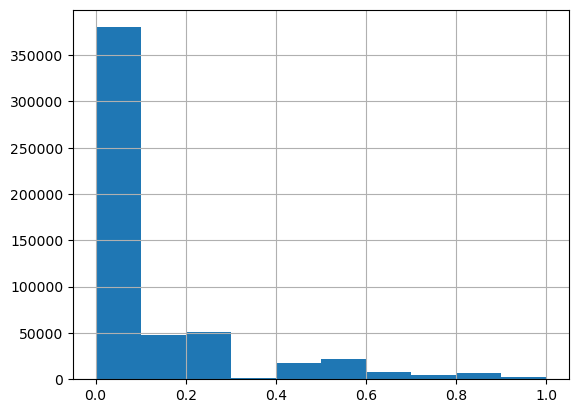

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 17.2 MB/s eta 0:00:00


In [13]:
#Celda1

# Preprocesamiento de los datos de entrenamiento con CountVectorizer
count_vect = CountVectorizer(lowercase=True)
train_counts = count_vect.fit_transform(X_train)

# Entrenamiento del modelo XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(train_counts, y_train)

# Preprocesamiento de los datos de prueba con CountVectorizer
test_counts = count_vect.transform(X_test)

# Predicciones y evaluación del modelo utilizando la métrica de MSE
predictions = xgb_model.predict(test_counts)
mse_xgboost = mean_squared_error(y_test, predictions)
print("MSE del modelo: ", mse_xgboost)


MSE del modelo:  0.020749476727491955


In [8]:
X_train

101388    Oral history is what ever they say it is.  Naz...
187598    Marijuana is less harmful to human health, tha...
175087    Look and see how many women are in photos of t...
521167    see like others we stood up to south africa ye...
343059                And next, they'll be coming for ISIS.
                                ...                        
110268    It's sad that BC can only choose between Liber...
259178    I'll stick to the estimates from Walter E. Wil...
365838    Isn't this exactly what Trump (and Obama befor...
131932    "no loyalty to them", I assume you mean.\nExac...
121958    You apparently have not really studied the gos...
Name: comment_text, Length: 362779, dtype: object

In [9]:
y_train

101388    0.0
187598    0.0
175087    0.0
521167    0.0
343059    0.0
         ... 
110268    0.2
259178    0.0
365838    0.0
131932    0.0
121958    0.0
Name: target, Length: 362779, dtype: float64

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
#Celda2
# Preprocesamiento de los datos de entrenamiento con CountVectorizer y Trigramas
count_vect = CountVectorizer(lowercase=True, ngram_range=(1, 3))
train_counts = count_vect.fit_transform(X_train)

# Entrenamiento del modelo XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(train_counts, y_train)

# Preprocesamiento de los datos de prueba con CountVectorizer
test_counts = count_vect.transform(X_test)

# Predicciones y evaluación del modelo utilizando la métrica de MSE
predictions = xgb_model.predict(test_counts)
mse_xgboost_trigram = mean_squared_error(y_test, predictions)
print("MSE del modelo: ", mse_xgboost_trigram)

MSE del modelo:  0.020656004628689325


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

La función **TfidfVectorizer** es una técnica de tokenización que se utiliza para convertir texto en vectores numéricos utilizando la frecuencia inversa de documentos de términos (TF-IDF, por sus siglas en inglés).

La idea detrás del TF-IDF es que las palabras que aparecen con frecuencia en un documento tienen menos valor discriminatorio para la clasificación que las palabras que aparecen en pocos documentos. Por lo tanto, el TF-IDF asigna un peso mayor a las palabras que aparecen en pocos documentos y un peso menor a las palabras que aparecen en muchos documentos. La fórmula para calcular el TF-IDF de un término es:

                                                  TF-IDF = TF * IDF

donde TF (frecuencia de término) es la frecuencia con la que aparece un término en un documento y IDF (frecuencia inversa de documentos) mide la rareza del término en el conjunto de documentos. La fórmula para calcular IDF es:

                                                   IDF = log(N / df)

donde N es el número total de documentos en el conjunto y df es el número de documentos que contienen el término.

La función TfidfVectorizer de Scikit-learn implementa esta técnica de tokenización. Al igual que CountVectorizer, TfidfVectorizer toma un corpus de texto como entrada y devuelve una matriz de vectores numéricos. Sin embargo, en lugar de contar simplemente la frecuencia de cada palabra en cada documento, TfidfVectorizer calcula el TF-IDF de cada palabra en cada documento. Además, TfidfVectorizer también realiza un preprocesamiento de texto que incluye la eliminación de stopwords y la normalización de mayúsculas y minúsculas.

Una ventaja del uso de TfidfVectorizer en comparación con CountVectorizer es que los términos más comunes en el corpus de texto (como las stopwords) tienen un peso menor en el cálculo de TF-IDF, lo que puede mejorar la calidad de los modelos de aprendizaje automático. Además, TfidfVectorizer puede manejar mejor la presencia de términos raros y poco frecuentes en el corpus.

Una desventaja del uso de TfidfVectorizer es que puede ser más lento que CountVectorizer, ya que implica el cálculo de la frecuencia inversa de documentos. Además, TfidfVectorizer puede no ser adecuado para todos los conjuntos de datos y modelos de aprendizaje automático, y puede requerir ajustes adicionales de parámetros para obtener un buen rendimiento.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
#Celda 4
# Preprocesamiento de los datos de entrenamiento con TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Entrenamiento del modelo XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_tfidf, y_train)

# Preprocesamiento de los datos de prueba con CountVectorizer
X_test_tfidf = tfidf.transform(X_test)

# Predicciones y evaluación del modelo utilizando la métrica de MSE
predictions = xgb_model.predict(X_test_tfidf)
mse_xgboost_Tfid = mean_squared_error(y_test, predictions)
print("MSE del modelo: ", mse_xgboost_Tfid)


MSE del modelo:  0.020343818478258637


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

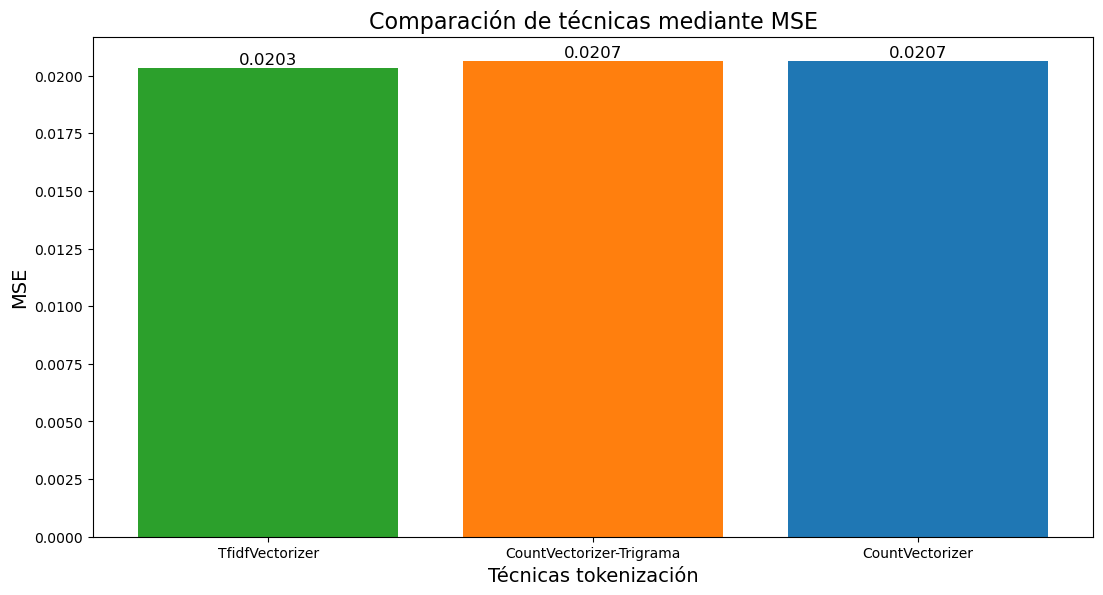

In [24]:
#Celda 5
#Gráficar y comparar MSE XGBoost

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de técnicas mediante MSE", fontsize=16)
ax.set_xlabel("Técnicas tokenización", fontsize=14)
ax.set_ylabel("MSE", fontsize=14)
ejeX = ['CountVectorizer-Trigrama', 'TfidfVectorizer', 'CountVectorizer']
ejeY = [mse_xgboost_trigram, mse_xgboost_Tfid, mse_xgboost]
colors = ['tab:green', 'tab:orange', 'tab:blue']
ejeX, ejeY = zip(*sorted(zip(ejeX, ejeY), key=lambda x: x[1]))
ax.bar(ejeX,ejeY, color=colors)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i], round(y[i],4), ha='center', va='bottom', fontsize=12)
addlabels(ejeX,ejeY,ax)
plt.show()

Según las diferentes técnicas aplicadas y el preprocesamiento de datos realizado, se puede evidenciar para el caso de ejemplo a pesar que el CountVectorizer mediante trigramas tiene el mayor tiempo de procesamiento, no mejora significativamente el modelo a partir de la métrica MSE respecto al modelo sin aplicar trigramas, obteniendo el mismo MSE para ambos; por su parte, la implementación de la función FfidfVectorizer obtuvo un mejor MSE (0.0203) respecto a las demás técnicas y funciones.